<a href="https://colab.research.google.com/github/GrzegorzSzczepanek/notes-from-papers/blob/main/eeg_cnn_ms-cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⛰ Deep Learning dla EEG

Poniższy dokument ma na celu przedstawienie informacji o technikach Deep Learningu do zadań klasyfikacyjnch, oraz kilka podstawowych informacji związanych z analizą spektrogramów EEG.

Zawarte zostaną także informacje dot. wyniki poszczególnych sieci i sugestie w doborze hiperparametrów.






# 1.1 Architektury sieci neuronowych używanych do klasyfikacji motorycznej (Motor Imagery MI)


# Trochę o danych i EEG

Na najbardziej podstawowym poziomie zbiory danych EEG są dwuwymiarowymi macierzami (czas x kanał) z wartościami rzeczywistymi, będącymi reprezentacją potencjałów wygenerowanych przez mózg i zebranych na skórze czaszki.
W czasie eksperymentu osoba, z której to czaszki pobiera się dane wykonuje jakieś zadanie.

Poza tym EEG to też zbiór fal. Parametrami fal są częstotliwość i faza będącą położeniem fali w danym cyklu przebiegu, którą można zmierzyć w radianach lub stopniach. Do właściwości fal EEG należą też amplituda, napięcie mierzone w mikrowoltach i moc będąca ilorazem energii i czasu.


# Metody redukcji wymiarowości stosowane do pracy z EEG
 - [ICA](https://www.geeksforgeeks.org/ml-independent-component-analysis/) - polega na przetwarzaniu sygnałów w celu wyodrębnienia z niego mniejszych komponentów. ICA zakłada, że przynajmniej jeden komponent jest gausowski i, że komponenty są statystycznie niezależne od siebie.
 - [PCA](https://builtin.com/data-science/step-step-explanation-principal-component-analysis#:~:text=Principal%20component%20analysis%2C%20or%20PCA,information%20in%20the%20large%20set) - reukcja wielowymiarowej przestrzenie do mniejszej ilości wymiarów identyfikując liniowe kombinacje oryginalnych zmiennych. Tworzy ona nowe niezwiązane zmienne, które mają uchwycić największe zmiany w danych.
 - [LFDA](https://www.researchgate.net/figure/Examples-of-dimensionality-reduction-by-nLFDA-LFDA-LDA-conventional-FDA-LPP-and-PCA_fig1_220359542) - maksymalizacja oddzielności między klasami bez zmienianie struktury wewnątrz nich

# Omówienie wyników różnych architektur sieci neuronowych dla danych z [DEAP](https://www.eecs.qmul.ac.uk/mmv/datasets/deap/) Web of Science i PubMed'u.
Wszystkie datasety, na których były przeprowadzone badania dotyczyły tasków klasyfikacyjnych (skupiamy się tylko na Motor Imagery) z użyciem uczenia głębokiego.

Dane EEG nieuchronnie zawierają szum, ponieważ elektrody mogą także pobrać niechciany elektryczny sygnał fiziologiczny spowodowany np. mruganiem albo napinaniem mięśni.

Wobec nieprawidłości w danych można było wyodrębnić trzy podejścia:
>- Usuwanie ich ręcznie
- Usuwanie ich Automatycznie
- Pozostawienie bez zmian


 Klasyfikatory, które zostały omówione [tutaj](https://iopscience.iop.org/article/10.1088/1741-2552/ab0ab5), klasyfikowały nie zawsze klasyfikowały tylko ruchy kończyn, ale także ruchy **językiem**.

 Autorzy wyżej wspomnianego głoszą, że na tamten moment (2019) nie znaleźli jeszcze odpowiedzi na to czy nie można z pomocą deep learningu osiągać podobne wyniki bez oczyszczania i usuwania części danych.


## Poniższy wykres przedstawia przedziały częstotliwości jakie zostały użyte w analizach EEG

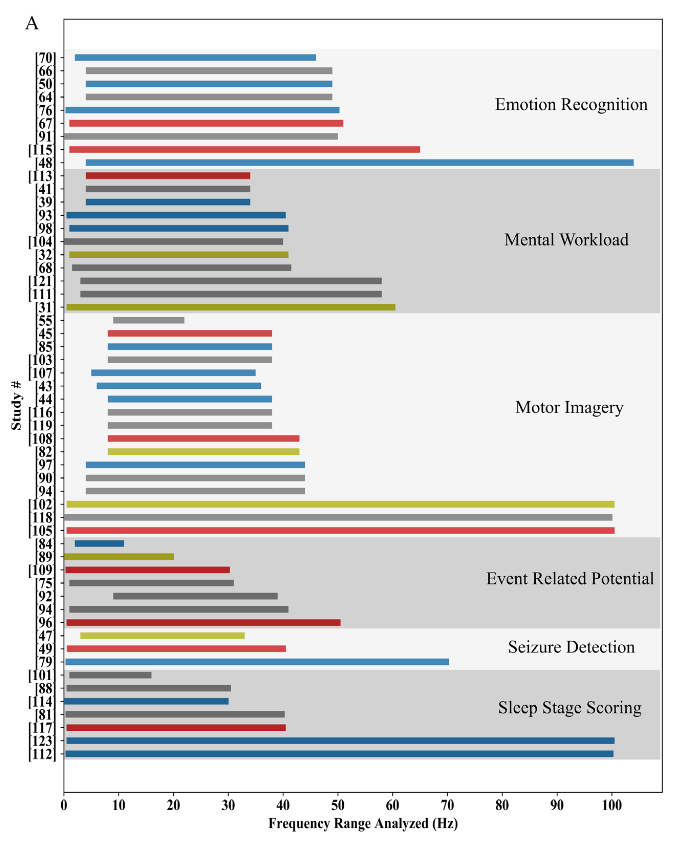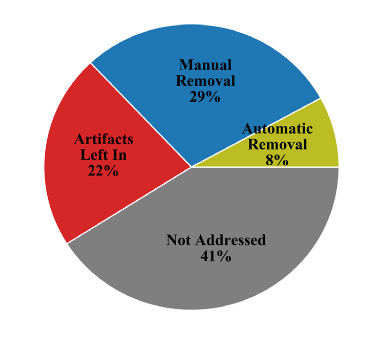



# Rodzaje sieci neuronowych, które można zastosować do Motor Imagery
>- Convolutional Neural Network (CNN)
- Deep belief network (DBN) i of restricted boltzmann machines (RBM’s)
- Recurrent neural network (RNN), number of RNN layers, type of RNN unit
- Stacked auto-encoders (SAE), number of hidden layers, activation
- Multi-layer perceptron neural network (MLPNN), number of hidden layers, activation
- Architektury hybrydowe

## Zastosowanie sieci CNN
Ten rodzaj sieci neuronowej bardzo dobrze radzi sobie z danymi EEG w postaci spektrogramu. Zazwyczaj spektrogramów używa się do wizualizacji danych, ale właściwości CNNów nadają im bardzo ciekawe zastosowanie jako input tych sieci, co zresztą przekłada się na dobre wyniki klasyfikacji.

Według autorów generowanie spektrogramów okazało się sukcesem nie tylko dla Motor Imagery.

# Rekomendacje autorów dla danego rodzaju taska:
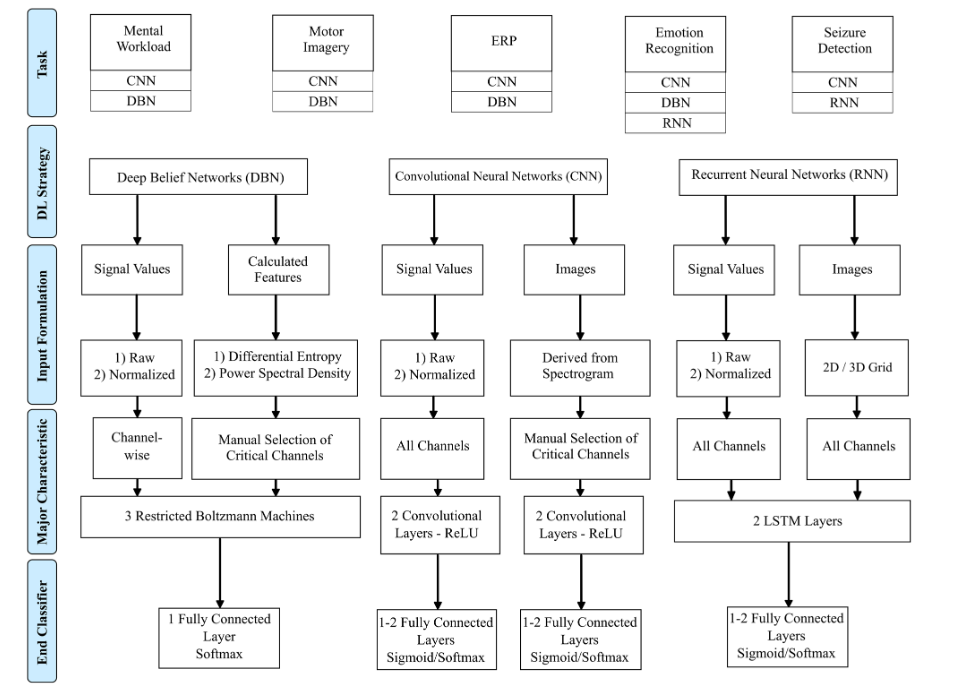

# Wyniki
Zdecydowanie najczęstszymi wyborami, a jednocześnie rekomendowanymi przez autorów [artykułu](https://iopscience.iop.org/article/10.1088/1741-2552/ab0ab5) dla Motor Imagery były sieci konwolucyjne i DBNy.

W przypadku badań CNN, które wykorzystywały obrazy jako dane wejściowe, średnia dokładność była zasadniczo taka sama jak w przypadku badań CNN, które wykorzystywały obliczone cechy jako dane wejściowe, przy czym obie strategie formułowania danych wejściowych osiągały średnią dokładność na poziomie 84%. Jest to porównywane ze średnią dokładnością 87% dla badań CNN, które wykorzystywały wartości sygnału jako dane wejściowe. Jest to sprzeczne z intuicją, która mówi, że im więcej wysiłku włożono w etapy wstępnego przetwarzania, tym dokładniejsza będzie klasyfikacja.

Ponadto głębsze CNN prześcigały płytkie sieci CNN.

Dla DBNów najlepsze wyniki dawały inputy złożone z wartości sygnałów.


# Funkcje aktywacyjne
Dla CNN spośród funkcji ReLU, SeLU, ELU najlepiej sprawdzała się ta druga.

## Wyniki różnych architektur dla tasków motor imagery
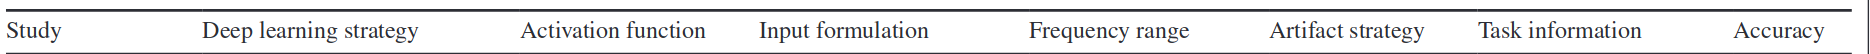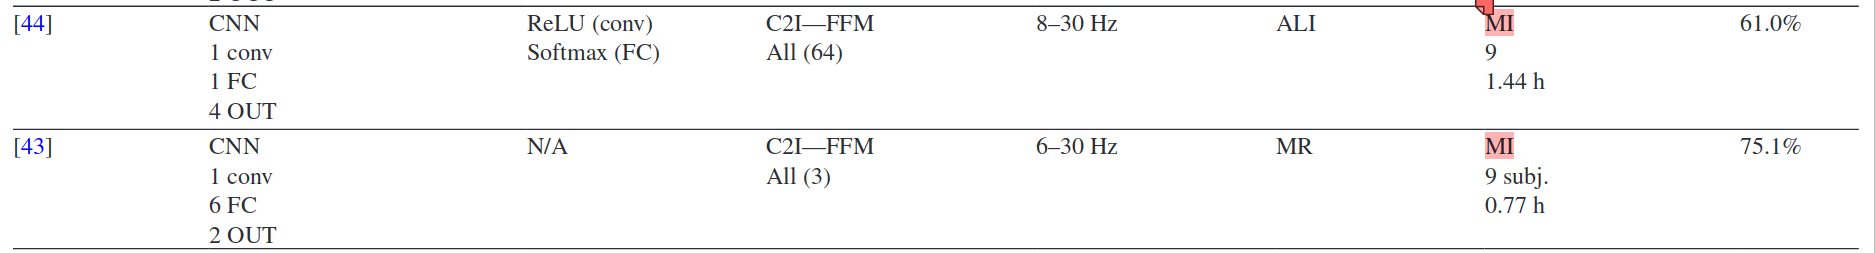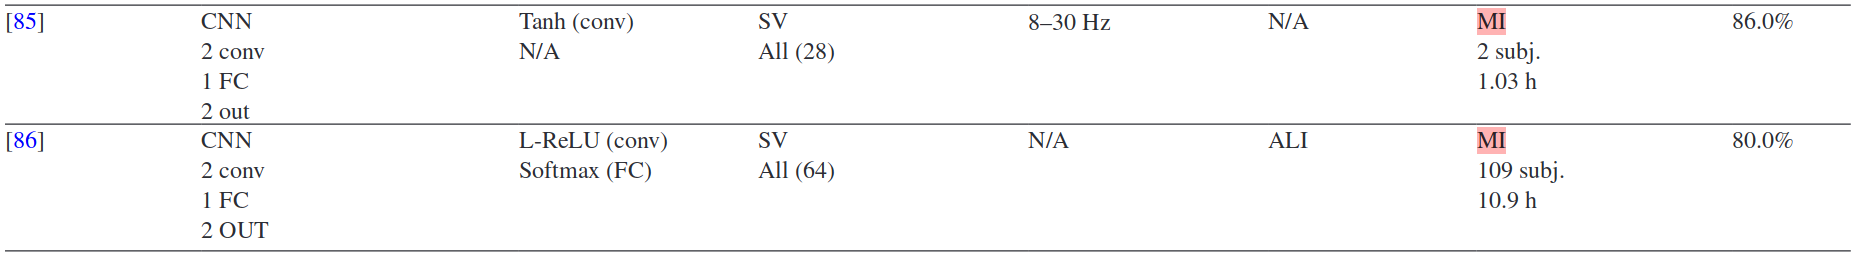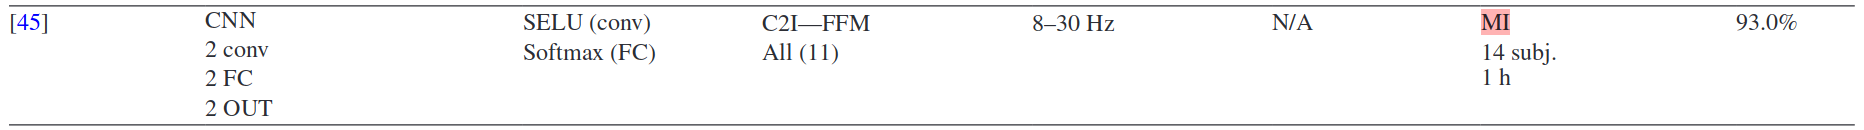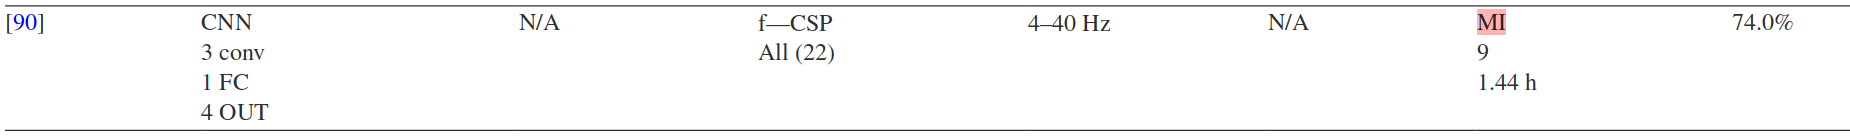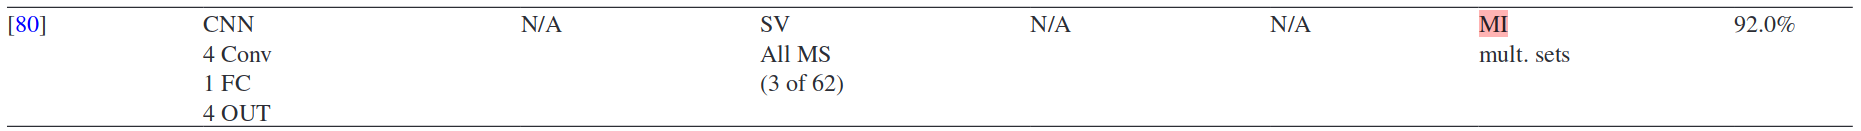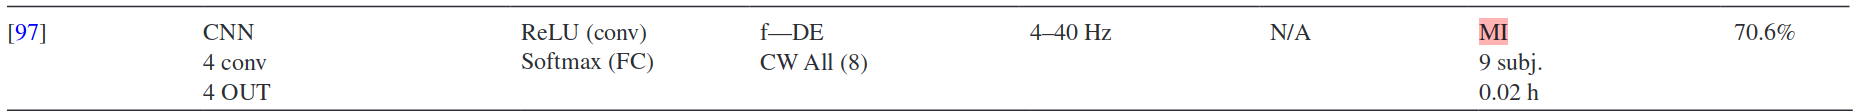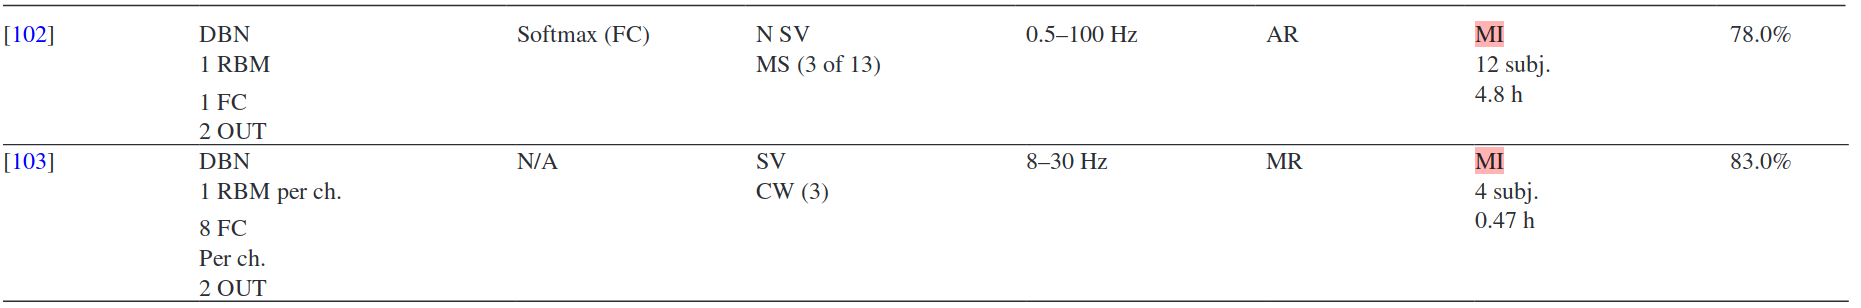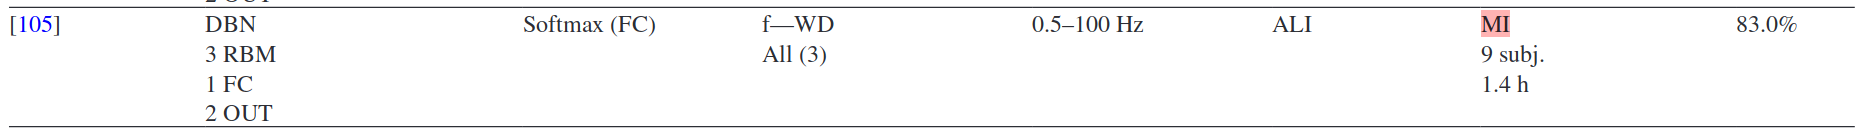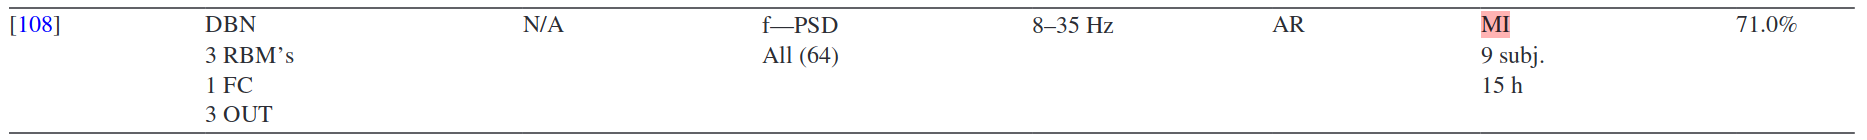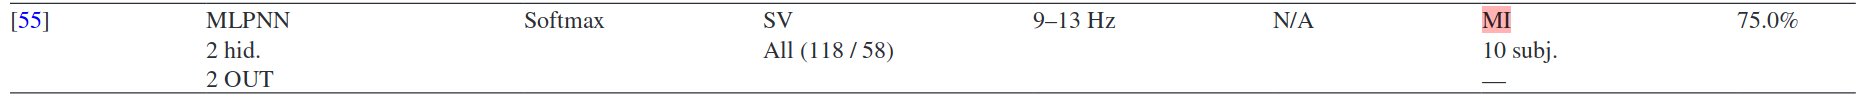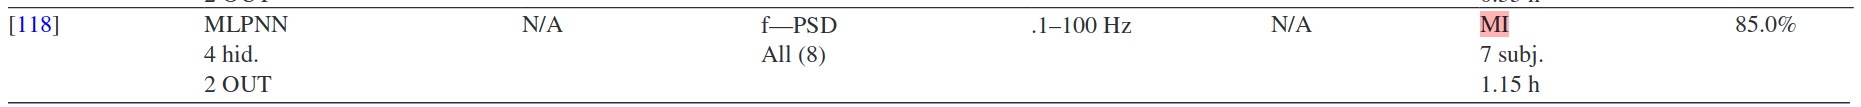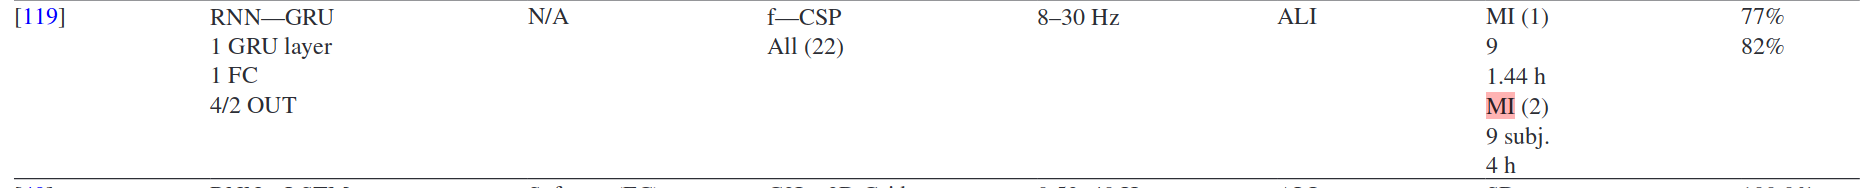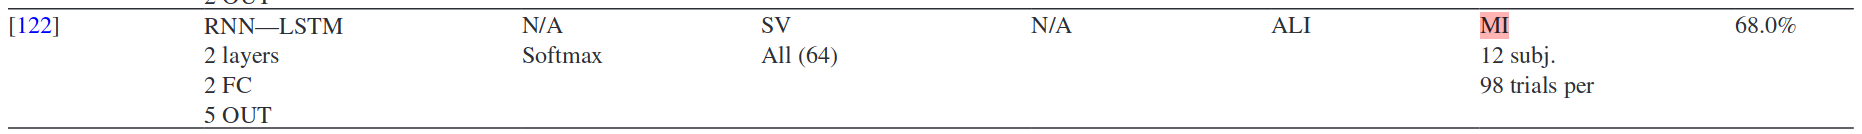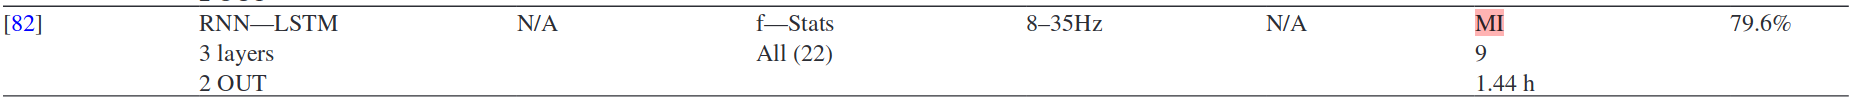

# 2 Multi-Scale CNN
Jak wynika z badania [Arunbaby'ego M. Roy'a](https://linkinghub.elsevier.com/retrieve/pii/S1746809422000180) multi-scale convolutional neural network (MS-CNN) radzą sobie dobrze z ekstrakcją rozróżnialnych cech różnych nie nakładających się kanonicznych pasm częstotliwości z wielu skal dla klasyfikacji MI-BCI

### Z artykułu Roy'a wynika, że uśredniona dokładność tego modelu wynosi 93,74% przy tym osiągając 0.92 we współczynniku [Cohen Kappa](https://en.wikipedia.org/wiki/Cohen's_kappa).
Współczynnik cohen kappa określa poziom zgody pomiędzy oceniającymi dla przedmiotów kategorycznych. A dokładność została osiąfnięta na BCI competition IV 2b dataset.

## Budowa sieci MS-CNN

Sieć tego typu potrafi zintegrować informacje z feature map w wysokiej i niskiej rozdzielczości. W skrócie z różnie przeskalowanym inputem.

W tych sieciach używa się wielu warstw konwolucyjnych z różnymi wielkościami filtra. Dzięki temu sieć tego typu może wykryć wzory/zależności w danych o niskiej i słabej rozdzielczości. Architektura ta sprawdza się w przetwarzaniu sygnału.

## Przykładowa sieć MS-CNN w PyTorchu

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiScaleCNN(nn.Module):
    def __init__(self, input_channels: int, output_classes: int):
        super().__init__()

        self.conv1_3x3 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv1_5x5 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv1_7x7 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.fc = nn.Linear(32 * 3, output_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out_3x3 = self.conv1_3x3(x)
        out_5x5 = self.conv1_5x5(x)
        out_7x7 = self.conv1_7x7(x)

        out = torch.cat((out_3x3, out_5x5, out_7x7), dim=1)

        flattened_size = out.size(1) * out.size(2) * out.size(3)
        out = out.view(-1, flattened_size)
        out = self.fc(out)
        out = self.sigmoid(out)

        return out


# model = MultiScaleCNN(input_channels=3, output_classes=2)
# print(model)


In [ ]:
# rozmiar taki, bo nie chciało mi się poprawiać błędów kształtu macierzy

batch_size = 1
rgb_channels = 1
height = 2
width = 2

input_tensor = torch.rand(batch_size, rgb_channels, height, width)

output_classes = 2

model = MultiScaleCNN(input_channels=rgb_channels, output_classes=output_classes)

output = model(input_tensor)

print("Output tensor shape:", output.shape)
# pierwsza wartość oznacza prawdopodobieństwo na należenie do klasy 1, a druga do 2.
output

Output tensor shape: torch.Size([1, 2])


tensor([[0.4944, 0.4953]], grad_fn=<SigmoidBackward0>)

>## Problemy sieci konwolucyjnych

- modele tego tpyu mają tylko jedną skalę konwolucyjną (convolutional scale) np. filter 3x3 w warstwach konwolucyjnych co może nie wystarczyć do wyodrębnienia cech wileu nie nakładających się na siebie kanonicznych pasm częstotliwości (delta, theta, alpha, beta, gamma)
- Po drugie, wewnętrzna ekstrakcja cech sygnału wejściowego jest często ignorowana, co ogranicza zdolność CNN do uczenia się większej liczby cech semantycznych z surowych danych EEG. Co więcej, ekstrakcja cech nie została zaprojektowana tak, aby w pełni zintegrować się z przepływem pracy DL, co jest głównym wąskim gardłem dla wdrażania aplikacji BCI w czasie rzeczywistym z wysoką dokładnością klasyfikacji.
- Zdarza się też, że ciężko może być nam pozyskać dostateczną liczbę danych, co uniemożliwia uzyskanie wysokiej dokładności w naszym MI-BCI (Motor Imagery BCI) klasyfikatorze

>### Rozwiązaniem tych problemów może być sieć MS-CNN

Co więcej, ważne cechy wewnętrzne i specyficzne dla użytkownika, w tym Differential Entropy (DE) i charakterystyka neural power spectra (NPS), zostały wyodrębnione z oryginalnych danych EEG i zintegrowane z proponowanym algorytmem w celu poprawy dokładności i wydajności modelu.

Dodatkowo zastosowano różne metody data augmentation (DA), takie jak gaussian noise (GN), segmentation and recombination (S & R) sygnału, window slicing (WS) i window wrapping (WW) w celu dalszej poprawy dokładności i odporności proponowanego klasyfikatora poprzez zwiększenie ilości danych treningowych EEG.

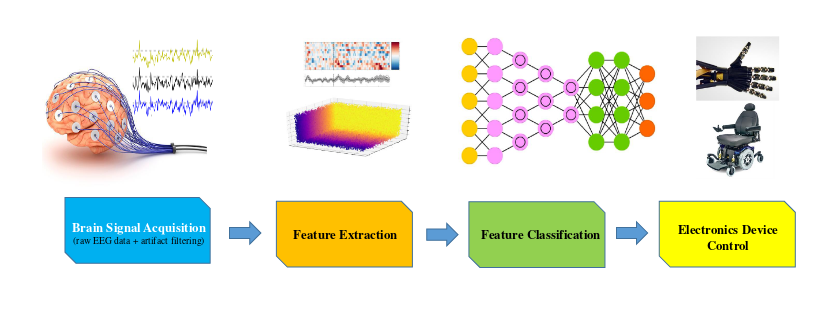

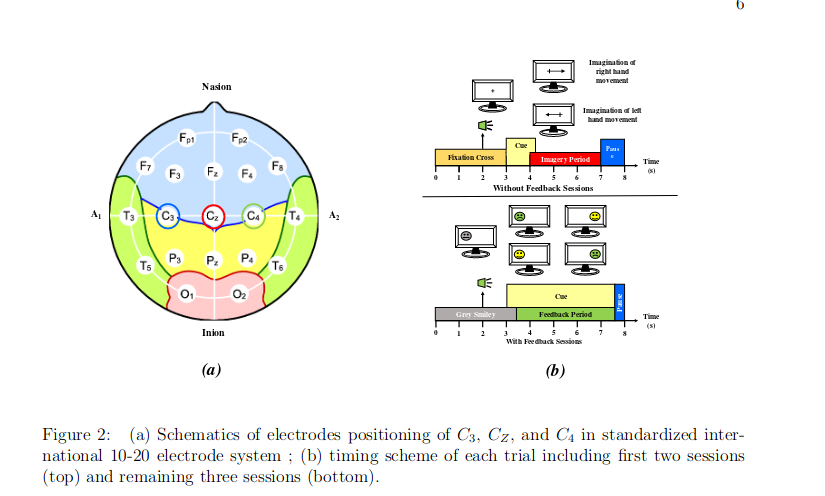

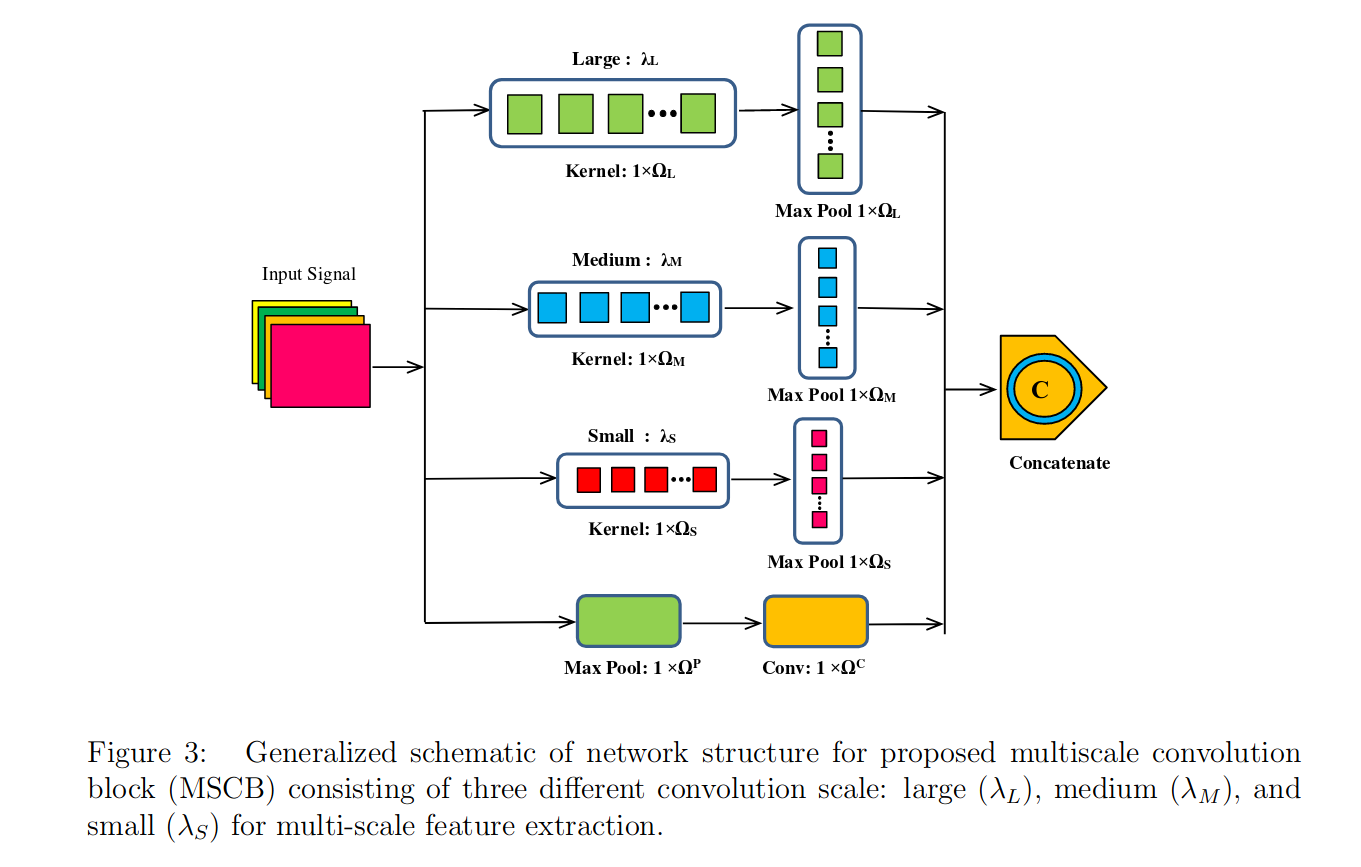

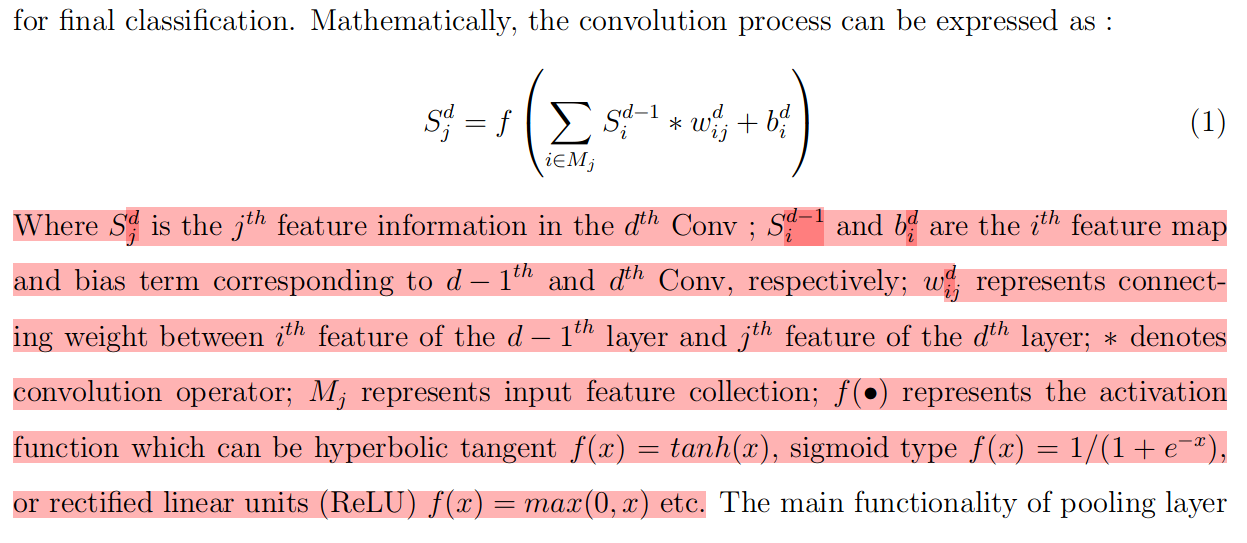

>## Znaczenie sygnałów fal w MI

Fale delta o niskiej częstotliwości (1-4HZ) okazały się mieć sporo informacji związanych z klasami.
W ruchowych systemach MI-BCI fale alpha(8-13HZ) i beta(13-30HZ) mają niemałe znaczenie ze względu na swoją rozdzielczość czasową(temporal resolution). Wzrosty i spadki spektrów mocy tych fal powodują event-related synchonization (ERS) i event-related desynchonization (ERD)

>Za to fale theta (4-8 Hz) różnią się dla tasków wykonywanych lewą i prawą dłonią.


>## multi-scale convolution block (MSCB)

W trakcie procesu konwolucji na warstwach konwolucyjnych stosowane są różne rozmiary kernela/filtra. Ma to pozwolić na znalezienie zależności w danych zarówno dla zarówno mniejszych i większych częstotliwości.


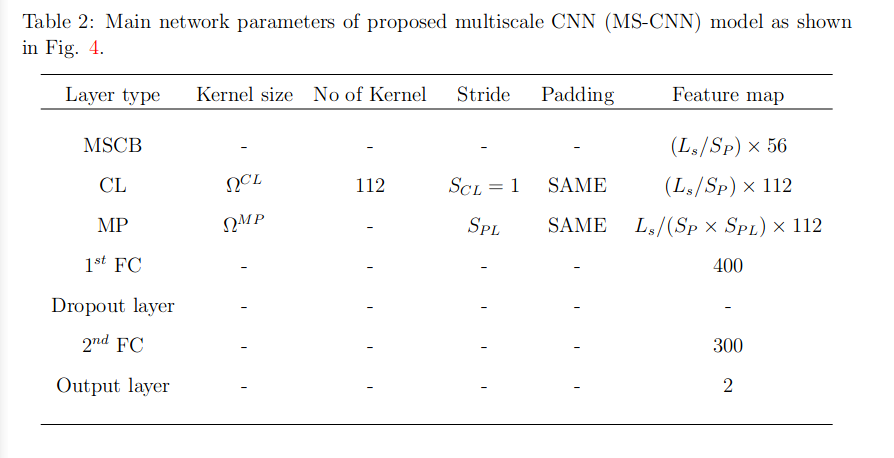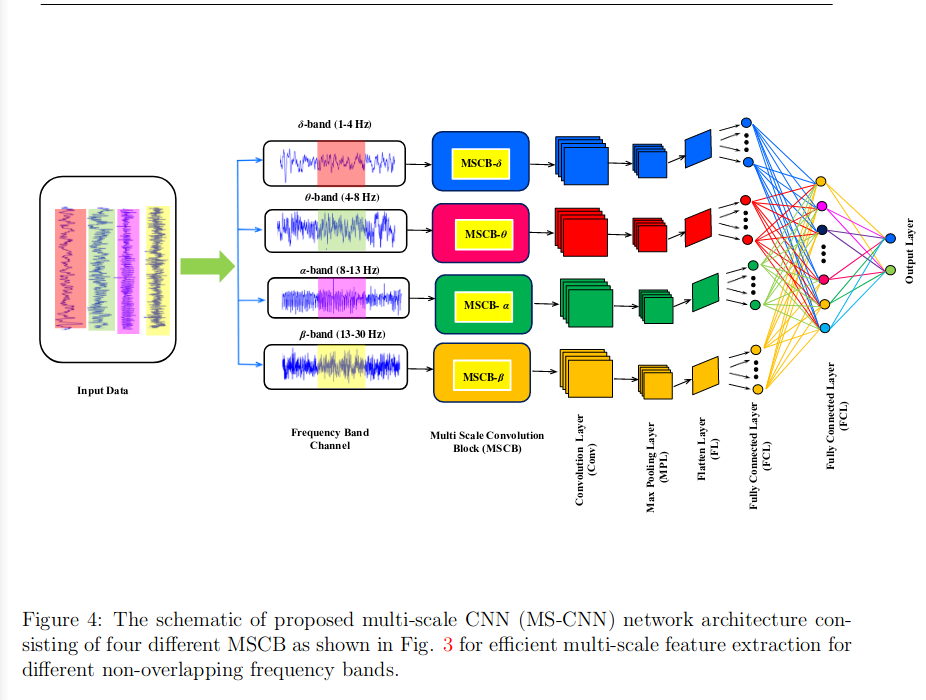

># Metody augmentacji sygnałów EEG

- [Gaussian noise](https://en.wikipedia.org/wiki/Gaussian_noise) - polega na dodaniu szumu gaussowskiego do oryginalnych danych treningowych
- segmentacja sygnału i rekombinacja w dziedzinie czasu - metoda ta polega na na podzieleniu każdej próby treningowej na na wiele segmentów, a następnie nowe próby są generowa z połączenia segmentów z innych, losowo wybranych, prób z tej samej klasy w zbiorze trningowym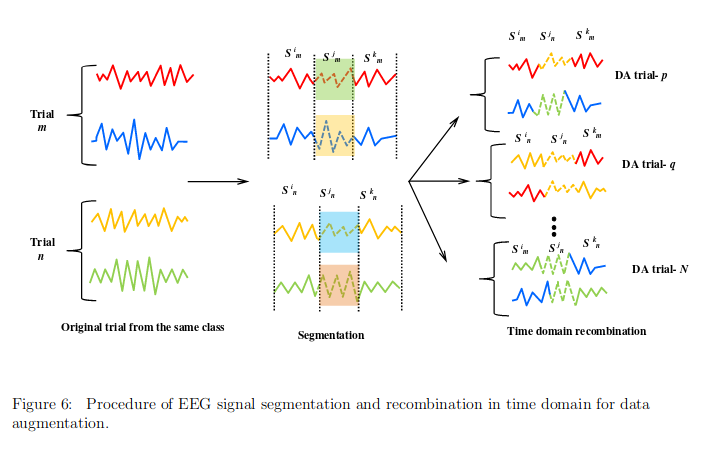
- Window slicing - Dane z eeg zostają podzielone na kawałki, a potem na tych kawałkach przeprowadza się klasyfikację
- Window Warping - polega na rozszerzaniu, lub zwężaniu losowe okienka z treningowego sygnału EEG przez jakąś określoną wartość.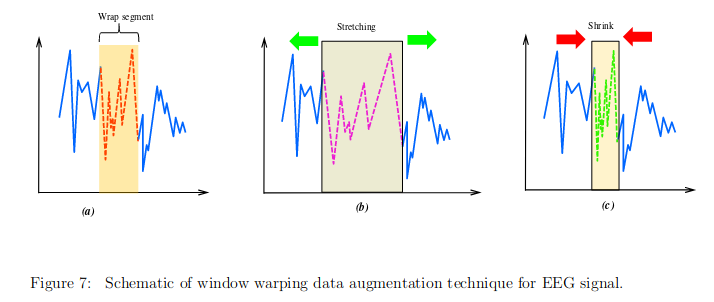



# Workflow
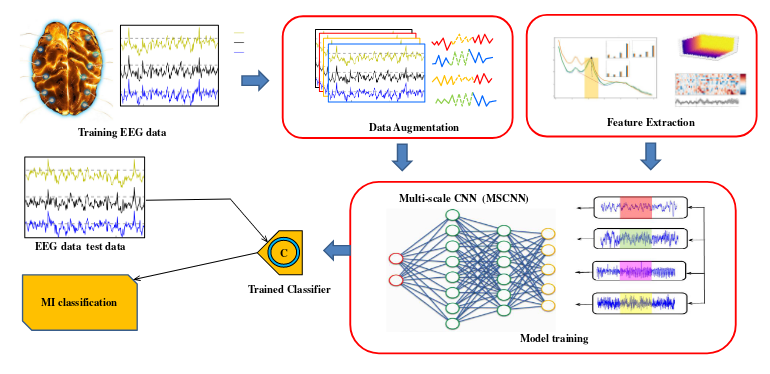

# Wyniki Autorów [artykułu](https://linkinghub.elsevier.com/retrieve/pii/S1746809422000180)
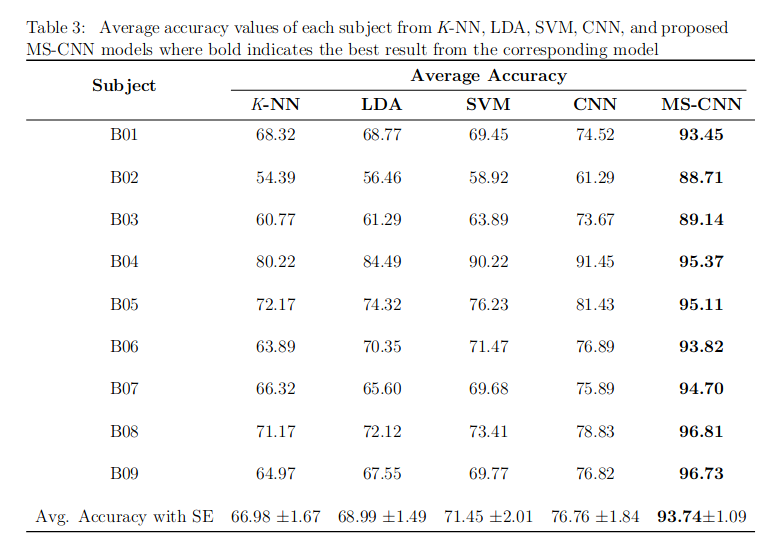

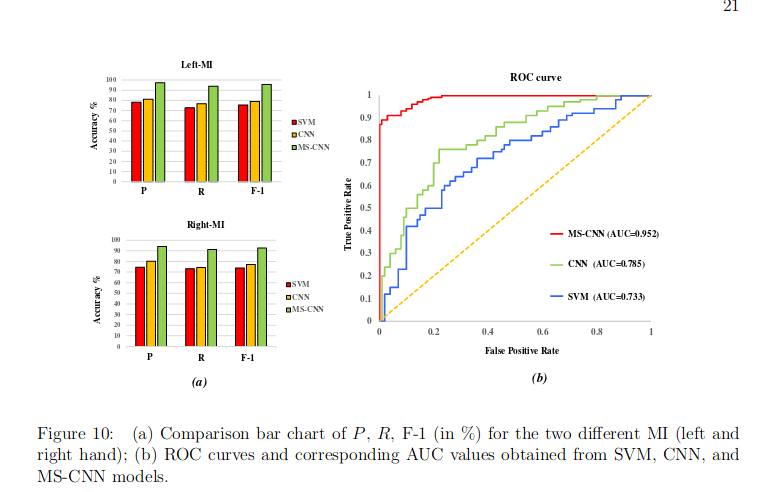

# Wpływ Feature Extraction i Augmentacji danych na rezultaty
>### Feature extraction:
- DE - [Differential entropy](https://en.wikipedia.org/wiki/Differential_entropy)
- NPS - [Neural Power Spectra](https://www.biorxiv.org/content/10.1101/299859v1)

>### Data Augmentation:
- GN - Gaussian Noise
- S&R - signal segmentation and recombination
- WS - Window Slicing
- WW - Window Wrapping
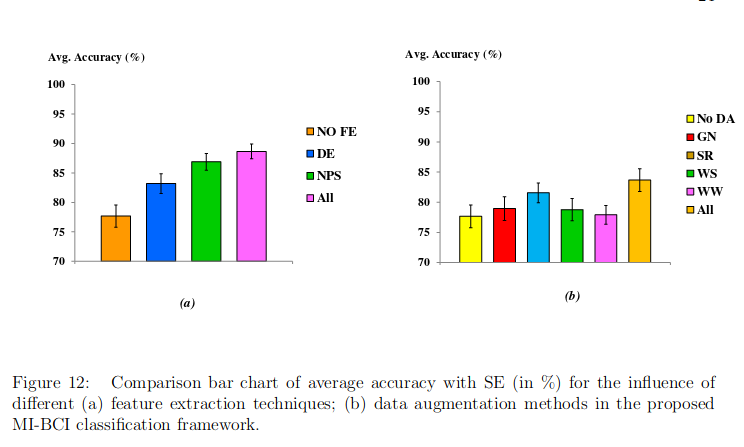

## Wpływ różnych konfiguracji wielkości kernela bloków konwolucyjnych na dokładność klasyfikacji

Kombinacja relatywnie niedużych wielkości kernela zdaje się osiągać najlepsze wyniki. Jednakże to kernele 1,3,5 są najbardziej wydajne obliczeniowo.


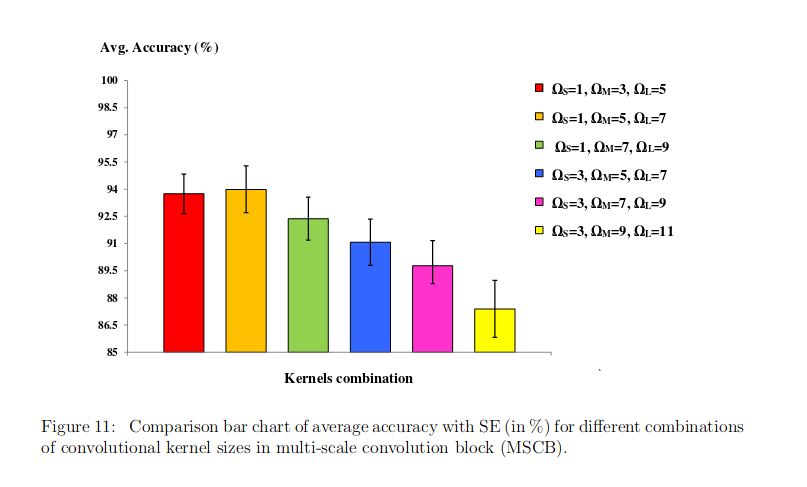

# 2. Intro do spektrogramów
Jako iż spektrogramy mogą zostać przez nas użyte jako input do sieci neuronowej warto dowiedzieć się o nich kilku informacji

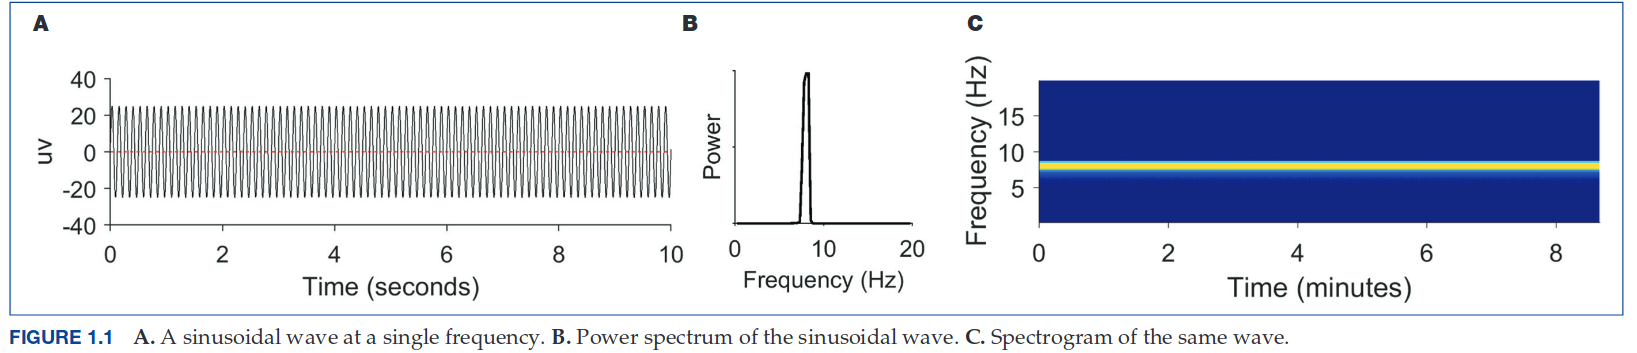

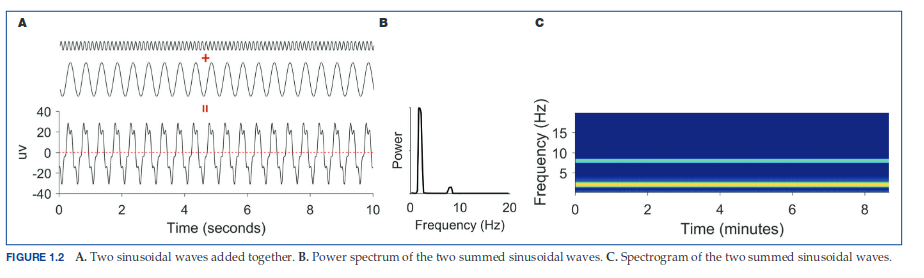

Dodanie do siebie dwóch fal sinusoidalnych powoduje powstanie dwóch szytów w spektrum mocy i dwiema liniami horyzontalnymi na spektrogramie

# 📑 Bibliografia
Poniższy dokument powstał na podstawie poniższych prac:
- Deep learning for electroencephalogram (EEG) classification tasks: a review To cite this article: Alexander Craik etal 2019 J.NeuralEng. 16 031001
https://iopscience.iop.org/article/10.1088/1741-2552/ab0ab5
- Atlas of Intensive Care Quantitative EEG (http://connect.springerpub.com/lookup/doi/10.1891/9780826193551)
- An efficient multi-scale CNN model with intrinsic feature integration for motor imagery EEG subject classification in brain-machine interfaces (https://linkinghub.elsevier.com/retrieve/pii/S1746809422000180)
